In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [ ]:
# df = pd.read_csv("Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
# df.columns = df.columns.str.strip()
# df = df.replace([np.inf, -np.inf], np.nan) # sanitize
# df = df.dropna()

# le = LabelEncoder()
# df['Label'] = le.fit_transform(df['Label'])

# X = df.drop(columns=['Label'])
# y = df['Label']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Begining of data preprocessing code added by Ahmad
df1 = pd.read_csv('/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.concat([df1, df2], axis=0)

df.columns = df.columns.str.strip() # Removes unnecessary white space from column names

label = {   # Labelling the target variable with numeric values
    'BENIGN': 0,
    'DDoS': 1,
    'DoS slowloris': 1,
    'DoS Slowhttptest': 1,
    'DoS Hulk': 1,
    'DoS GoldenEye': 1,
    'Heartbleed': 2
}

df['Label'] = df['Label'].map(label) # mapping the labels to their numeric values in df

df = df.dropna() # Removing rows that contain NaN values in df
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)] # Removing rows that contain inf values in df
df = df.loc[:, (df != 0).any(axis=0)] # Removing columns that only contain 0s in df
df.drop(df[df['Label'] == 2].index, inplace = True) # Removing the Heartbleed data (only 11 present)

def replace_port_numbers(x):
     return 1 if x == 80 else 0

df['Destination Port'] = df['Destination Port'].apply(replace_port_numbers)

X = df.drop(columns=['Label'])
y = df['Label']

correlations = abs(X.corrwith(pd.Series(y)))
correlations = correlations.sort_values(ascending=False)
X = X.drop(correlations.index[25:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# End of data preprocessing code added by Ahmad

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9903829378925332
Precision: 0.9905137885393971
Recall: 0.9903829378925332
F1 Score: 0.9903949499980885


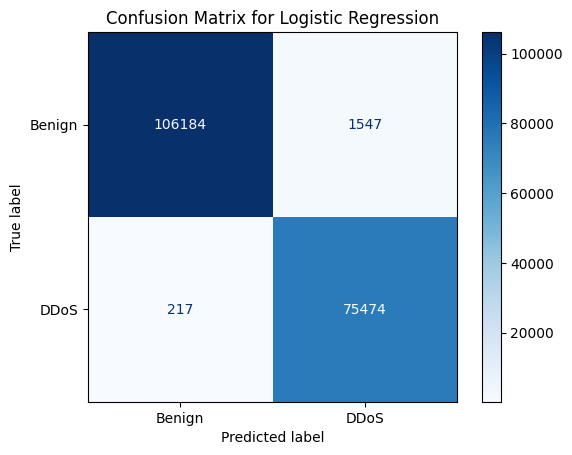

In [ ]:
#Beginning of Confusion Matrix: Yesha Modi
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Filter predictions and true labels to include only Benign (0) and DDoS (1)
y_test_binary = y_test[y_test.isin([0, 1])]
y_pred_binary = y_pred[np.isin(y_test, [0, 1])].flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'DDoS'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()
#Ending of Confusion Matrix: Yesha Modi